<a href="https://colab.research.google.com/github/Harsh-Singh24/EDA_school_analysis/blob/main/School_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Importing Libraries

In [58]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

#2 Loading the data and visualization the data

In [59]:
#dataset 1
dataset = pd.read_csv('/content/drive/MyDrive/Projects for job/Project.csv')

In [60]:
#dataset 2  (With School Names)
dataset_school = pd.read_csv('/content/drive/MyDrive/Projects for job/School Names.csv')

In [61]:
dataset.head()

,DBN,Grade,Year,Demographic,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
0,01M015,3,2006,Female,23,675,0,0,7,30.4,12,52.2,4,17.4,16,69.6
1,01M015,3,2006,Male,16,657,2,12.5,4,25,8,50,2,12.5,10,62.5
2,01M015,3,2007,Female,11,679,2,18.2,0,0,6,54.5,3,27.3,9,81.8
3,01M015,3,2007,Male,20,668,0,0,3,15,16,80,1,5,17,85
4,01M015,3,2008,Female,17,661,0,0,5,29.4,12,70.6,0,0,12,70.6


In [62]:
dataset.shape

(68028, 16)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68028 entries, 0 to 68027
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DBN                68028 non-null  object
 1   Grade              68028 non-null  object
 2   Year               68028 non-null  int64 
 3   Demographic        68028 non-null  object
 4   Number Tested      68028 non-null  int64 
 5   Mean Scale Score   68028 non-null  object
 6   Num Level 1        68028 non-null  object
 7   Pct Level 1        68028 non-null  object
 8   Num Level 2        68028 non-null  object
 9   Pct Level 2        68028 non-null  object
 10  Num Level 3        68028 non-null  object
 11  Pct Level 3        68028 non-null  object
 12  Num Level 4        68028 non-null  object
 13  Pct Level 4        68028 non-null  object
 14  Num Level 3 and 4  68028 non-null  object
 15  Pct Level 3 and 4  68028 non-null  object
dtypes: int64(2), object(14)
memory usage: 8.

In [64]:
dataset.isnull().sum().sum()

0

# 3 Data wrangling

Assuming values = s are missing values.

## 3.1 dataset 1 : Column Name: DBN, Grade, Year, Demographic, Number Tested, Mean Scale Score, Num Level 1, Pct Level 1, Num Level 2, Pct Level 2, Num Level 3, Pct Level 3, Num Level 4, Pct Level 4, Num Level 3 and 4 and Pct Level 3 and 4

In [65]:
#replacing S with Null
datasets = [dataset,dataset_school]
for y in datasets:
  for x in y.columns:
    y[x] = y[x].apply(lambda x : None if x == 's' else x)

In [66]:
dataset.isnull().sum()

DBN                     0
Grade                   0
Year                    0
Demographic             0
Number Tested           0
Mean Scale Score     3899
Num Level 1          2989
Pct Level 1          2989
Num Level 2          2989
Pct Level 2          2989
Num Level 3          2989
Pct Level 3          2989
Num Level 4          2784
Pct Level 4          2989
Num Level 3 and 4    2784
Pct Level 3 and 4    2989
dtype: int64

In [67]:
#checking percentage of missing values in each Feature
for x in dataset.columns:
  count_missing = (((dataset[x].isnull().sum())/68028)*100)
  count_missing = round(count_missing,2)
  print(f'The percentage of missing values in feature {x} :', count_missing)

The percentage of missing values in feature DBN : 0.0
The percentage of missing values in feature Grade : 0.0
The percentage of missing values in feature Year : 0.0
The percentage of missing values in feature Demographic : 0.0
The percentage of missing values in feature Number Tested : 0.0
The percentage of missing values in feature Mean Scale Score : 5.73
The percentage of missing values in feature Num Level 1 : 4.39
The percentage of missing values in feature Pct Level 1 : 4.39
The percentage of missing values in feature Num Level 2 : 4.39
The percentage of missing values in feature Pct Level 2 : 4.39
The percentage of missing values in feature Num Level 3 : 4.39
The percentage of missing values in feature Pct Level 3 : 4.39
The percentage of missing values in feature Num Level 4 : 4.09
The percentage of missing values in feature Pct Level 4 : 4.39
The percentage of missing values in feature Num Level 3 and 4 : 4.09
The percentage of missing values in feature Pct Level 3 and 4 : 4.39

In [68]:
col = dataset.columns.to_list()
col

['DBN',
 'Grade',
 'Year',
 'Demographic',
 'Number Tested',
 'Mean Scale Score',
 'Num Level 1',
 'Pct Level 1',
 'Num Level 2',
 'Pct Level 2',
 'Num Level 3',
 'Pct Level 3',
 'Num Level 4',
 'Pct Level 4',
 'Num Level 3 and 4',
 'Pct Level 3 and 4']

In [69]:
col.remove('Demographic')
col.remove('DBN')
col.remove('Grade')

In [70]:
#changing the data type
for x in col:
  dataset[x] = dataset[x].astype('float64')

In [71]:
dataset['Year'] = dataset['Year'].astype('int64')
dataset['Number Tested'] = dataset['Number Tested'].astype('int64')

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68028 entries, 0 to 68027
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DBN                68028 non-null  object 
 1   Grade              68028 non-null  object 
 2   Year               68028 non-null  int64  
 3   Demographic        68028 non-null  object 
 4   Number Tested      68028 non-null  int64  
 5   Mean Scale Score   64129 non-null  float64
 6   Num Level 1        65039 non-null  float64
 7   Pct Level 1        65039 non-null  float64
 8   Num Level 2        65039 non-null  float64
 9   Pct Level 2        65039 non-null  float64
 10  Num Level 3        65039 non-null  float64
 11  Pct Level 3        65039 non-null  float64
 12  Num Level 4        65244 non-null  float64
 13  Pct Level 4        65039 non-null  float64
 14  Num Level 3 and 4  65244 non-null  float64
 15  Pct Level 3 and 4  65039 non-null  float64
dtypes: float64(11), int64(

In [73]:
#extracting City code from DBN column
dataset['city code'] = dataset['DBN'].str[:2]

## 3.2 dataset 2 : Column Name: DBN, School Name, Num of SAT Test Takers, SAT Critical Reading Avg Score, SAT Math Avg. Score, SAT Writing AVG Score

In [74]:
dataset_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           421 non-null    object
 3   SAT Critical Reading Avg. Score  421 non-null    object
 4   SAT Math Avg. Score              421 non-null    object
 5   SAT Writing Avg. Score           421 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


In [75]:
dataset_school.isnull().sum()

DBN                                 0
SCHOOL NAME                         0
Num of SAT Test Takers             57
SAT Critical Reading Avg. Score    57
SAT Math Avg. Score                57
SAT Writing Avg. Score             57
dtype: int64

In [76]:
#checking percentage of missing values in each Feature
for x in dataset_school.columns:
  count_missing = (((dataset_school[x].isnull().sum())/478)*100)
  count_missing = round(count_missing,2)
  print(f'The percentage of missing values in feature {x} :', count_missing)

The percentage of missing values in feature DBN : 0.0
The percentage of missing values in feature SCHOOL NAME : 0.0
The percentage of missing values in feature Num of SAT Test Takers : 11.92
The percentage of missing values in feature SAT Critical Reading Avg. Score : 11.92
The percentage of missing values in feature SAT Math Avg. Score : 11.92
The percentage of missing values in feature SAT Writing Avg. Score : 11.92


In [77]:
#checking rows with null value in dataset_school
null_mask = dataset_school.isnull().any(axis = 1)
dataset_school[null_mask]

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
22,02M392,MANHATTAN BUSINESS ACADEMY,None,None,None,None
23,02M393,BUSINESS OF SPORTS SCHOOL,None,None,None,None
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,None,None,None,None
38,02M427,MANHATTAN ACADEMY FOR ARTS & LANGUAGE,None,None,None,None
40,02M437,HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES,None,None,None,None
41,02M438,INTERNATIONAL HIGH SCHOOL AT UNION SQUARE,None,None,None,None
47,02M473,WASHINGTON IRVING YABC,None,None,None,None
77,03M402,THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS,None,None,None,None
78,03M403,THE GLOBAL LEARNING COLLABORATIVE,None,None,None,None
81,03M417,FRANK MCCOURT HIGH SCHOOL,None,None,None,None


In [78]:
print(dataset_school[null_mask].shape)

(57, 6)


In School name dataset, We dont have data for 57 schools.
so we are droping these  values, And storing the dataframe in new dataframe.


In [79]:
#droping the rows containing null values in the dataframe
dataset_schools = dataset_school.dropna()

In [80]:
dataset_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              421 non-null    object
 1   SCHOOL NAME                      421 non-null    object
 2   Num of SAT Test Takers           421 non-null    object
 3   SAT Critical Reading Avg. Score  421 non-null    object
 4   SAT Math Avg. Score              421 non-null    object
 5   SAT Writing Avg. Score           421 non-null    object
dtypes: object(6)
memory usage: 23.0+ KB


In [81]:
#changing the datatype in dataset_schools.
cols = ['Num of SAT Test Takers','SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']
for x in cols:
  dataset_schools[x] = dataset_schools[x].astype('int64')

In [82]:
#Creating a new column With total score in dataset_schools dataframe
dataset_schools['Total avg. SAT score'] = dataset_schools['SAT Critical Reading Avg. Score']+ dataset_schools['SAT Math Avg. Score'] + dataset_schools['SAT Writing Avg. Score']

# 4 Univariate Analysis

In [83]:
col_with_missing = ['Mean Scale Score','Num Level 1','Pct Level 1','Num Level 2','Pct Level 2','Num Level 3','Pct Level 3','Num Level 4','Pct Level 4','Num Level 3 and 4','Pct Level 3 and 4']

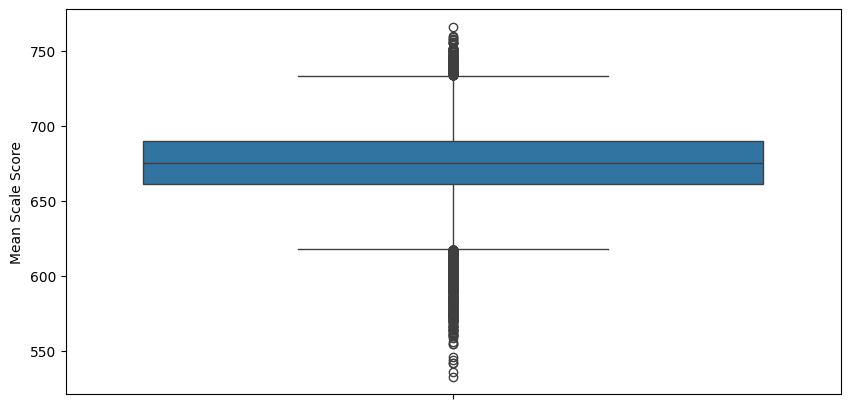

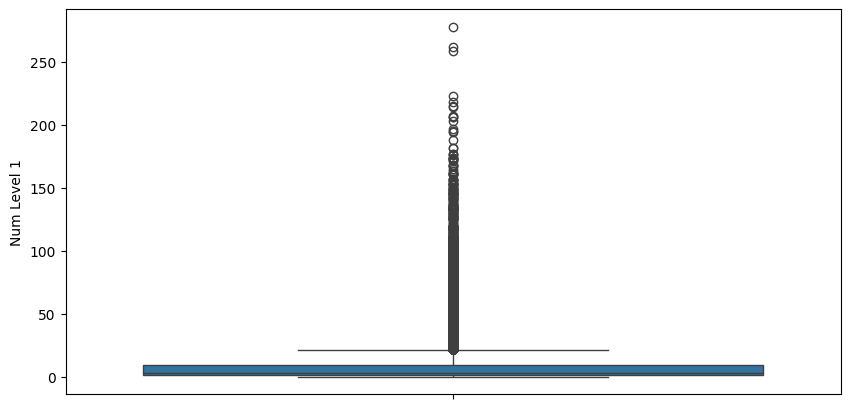

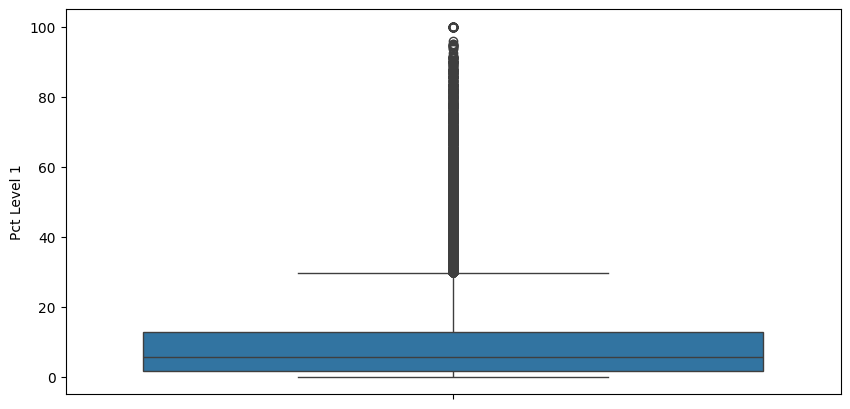

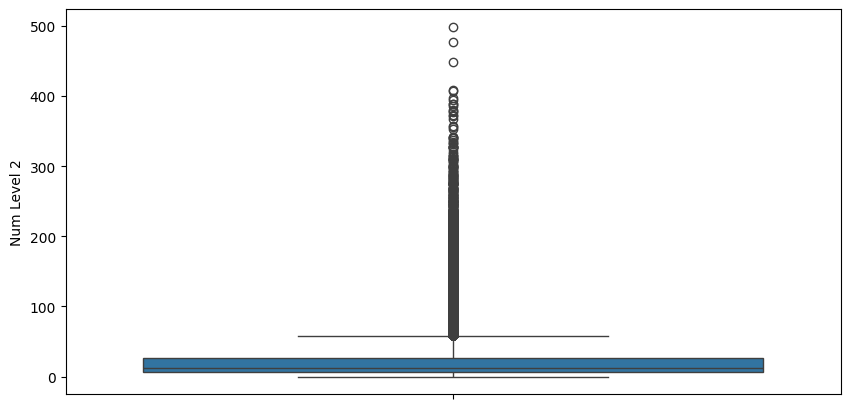

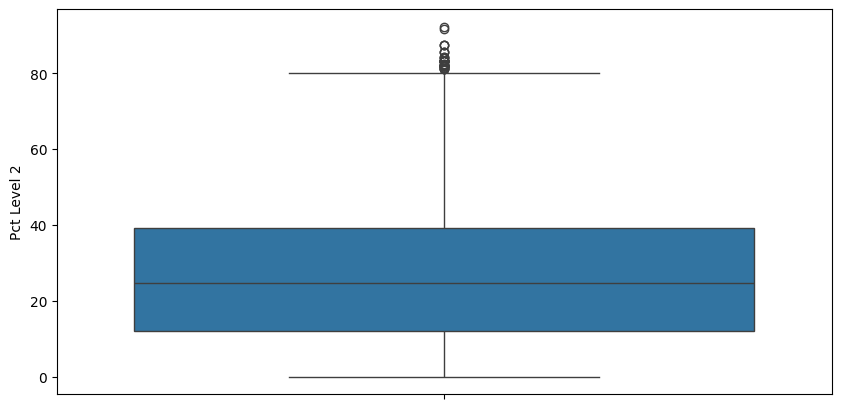

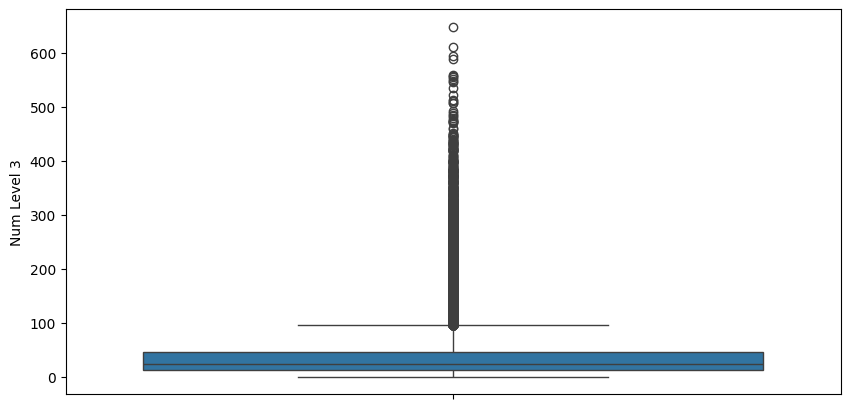

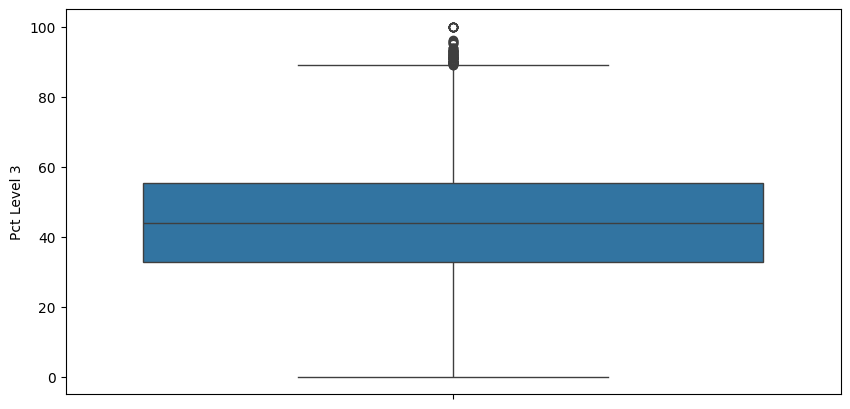

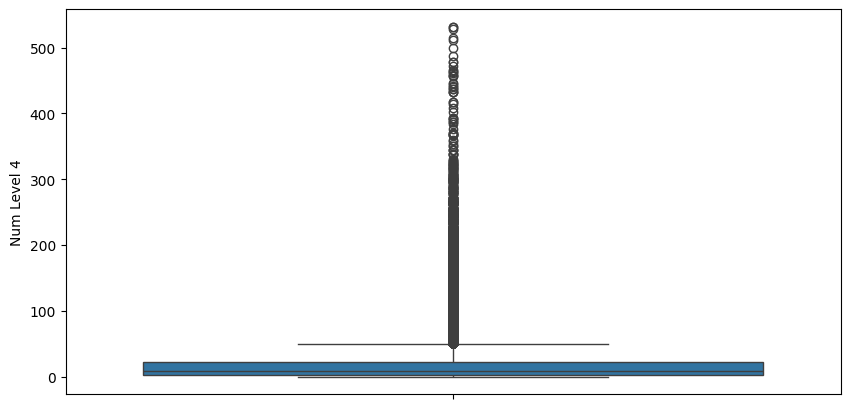

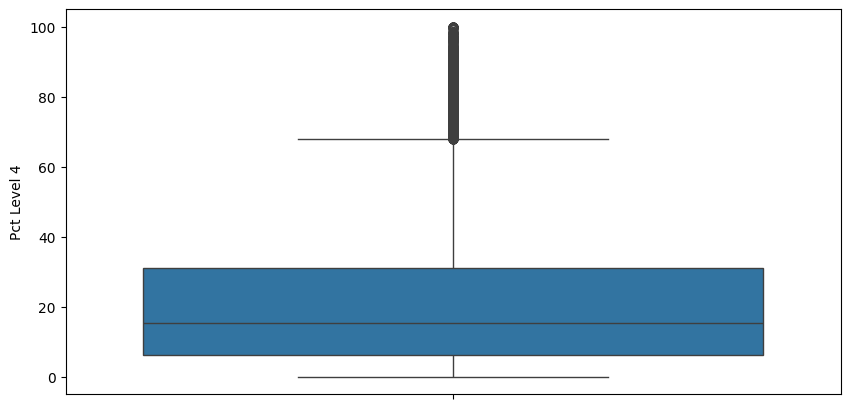

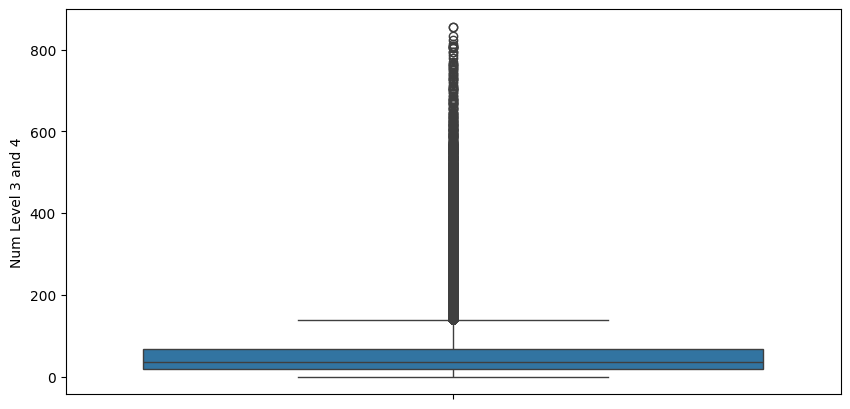

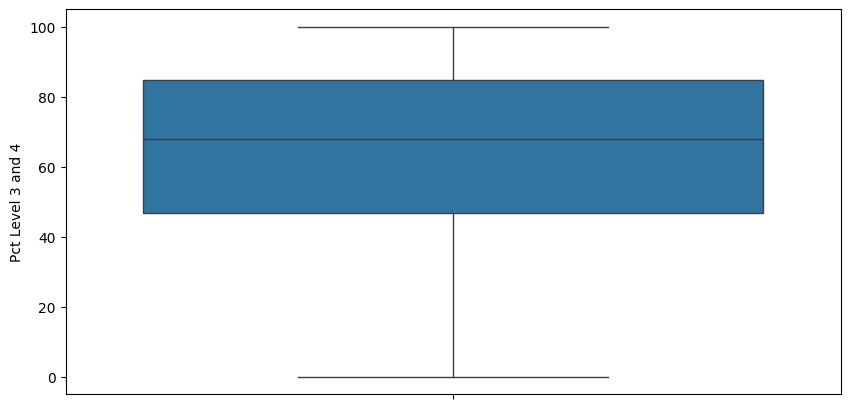

In [84]:
for x in col_with_missing:
  sns.boxplot(dataset[x])
  plt.show()

From Above box plot we can see that every feature has many outliers. So for missing value imputation we should go for median.

In [85]:
for x in col_with_missing:
  print(f'The min value for feature {x} is ', dataset[x].min())
  print(f'The max value for feature {x} is ', dataset[x].max())
  print(f'The mean value for feature {x} is ', dataset[x].mean())
  print(f'The median value for feature {x} is ', dataset[x].median())
  print('\n')

The min value for feature Mean Scale Score is  533.0
The max value for feature Mean Scale Score is  766.0
The mean value for feature Mean Scale Score is  674.3006907951161
The median value for feature Mean Scale Score is  675.0


The min value for feature Num Level 1 is  0.0
The max value for feature Num Level 1 is  278.0
The mean value for feature Num Level 1 is  7.732729593013422
The median value for feature Num Level 1 is  3.0


The min value for feature Pct Level 1 is  0.0
The max value for feature Pct Level 1 is  100.0
The mean value for feature Pct Level 1 is  9.369867310383002
The median value for feature Pct Level 1 is  5.6


The min value for feature Num Level 2 is  0.0
The max value for feature Num Level 2 is  499.0
The mean value for feature Num Level 2 is  23.088362367195067
The median value for feature Num Level 2 is  13.0


The min value for feature Pct Level 2 is  0.0
The max value for feature Pct Level 2 is  92.3
The mean value for feature Pct Level 2 is  26.28932640415

In [86]:
#Replacing All the missing values with its median values
for y in col_with_missing:
  dataset[y].fillna(dataset[y].median(),inplace = True)

In [87]:
#checking percentage of missing values in each Feature
dataset.isnull().sum()

DBN                  0
Grade                0
Year                 0
Demographic          0
Number Tested        0
Mean Scale Score     0
Num Level 1          0
Pct Level 1          0
Num Level 2          0
Pct Level 2          0
Num Level 3          0
Pct Level 3          0
Num Level 4          0
Pct Level 4          0
Num Level 3 and 4    0
Pct Level 3 and 4    0
city code            0
dtype: int64

In [88]:
#finding the total number of schools.
dataset['DBN'].nunique()

1154

This signifies we have data of total 1154 schools.

In [89]:
#checking. How many years of data we have.
dataset['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012])

so we have the data of 7 years,starting from 2006 to 2012.

In [90]:
dataset['Grade'].unique()

array(['3', '4', '5', '6', 'All Grades', '7', '8'], dtype=object)

In [91]:
for x in dataset.columns:
  print(f'number of unique values in feature {x} are :', dataset[x].nunique())
  print('\n')

number of unique values in feature DBN are : 1154


number of unique values in feature Grade are : 7


number of unique values in feature Year are : 7


number of unique values in feature Demographic are : 2


number of unique values in feature Number Tested are : 840


number of unique values in feature Mean Scale Score are : 208


number of unique values in feature Num Level 1 are : 184


number of unique values in feature Pct Level 1 are : 747


number of unique values in feature Num Level 2 are : 329


number of unique values in feature Pct Level 2 are : 755


number of unique values in feature Num Level 3 are : 445


number of unique values in feature Pct Level 3 are : 882


number of unique values in feature Num Level 4 are : 359


number of unique values in feature Pct Level 4 are : 958


number of unique values in feature Num Level 3 and 4 are : 647


number of unique values in feature Pct Level 3 and 4 are : 986


number of unique values in feature city code are : 33




In [92]:
Cat_features = ['DBN','Grade','Year','Demographic']
print('We have four categoruical featueres :', Cat_features )

We have four categoruical featueres : ['DBN', 'Grade', 'Year', 'Demographic']


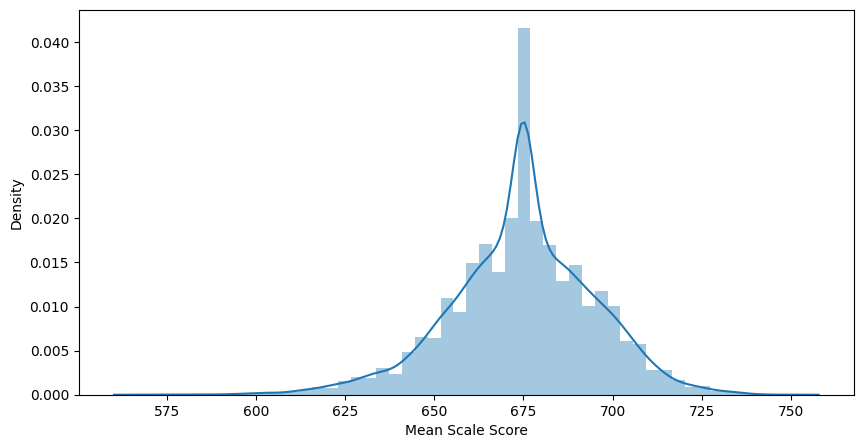

In [93]:
#Filterinig the data for all grades (considering full the dataset at same time cause duplicity of data)
dataset_allgrade = dataset[dataset['Grade'] == 'All Grades']

#checking distribution of mean Score
sns.distplot(dataset_allgrade['Mean Scale Score'])
plt.show()

## What is/are the insight(s) found from the chart?

Mean scale score is normally distributed.

# 5 Bivariate analysis and Multivariate analysis.

## 5.1 Understading the Grades

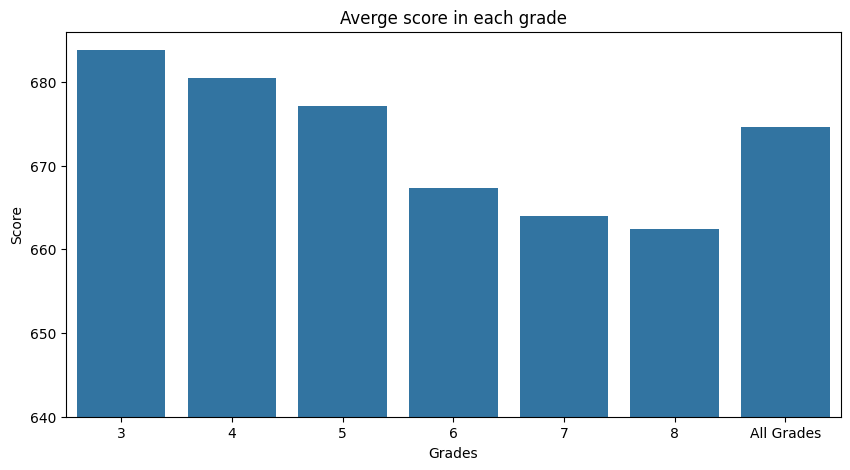

In [110]:
#chart 1 : Average SAT score in each grade
sns.barplot(x = dataset.groupby('Grade')['Mean Scale Score'].mean().index, y = dataset.groupby('Grade')['Mean Scale Score'].mean()-640, bottom = 640)
plt.title('Averge score in each grade')
plt.xlabel('Grades')
plt.ylabel('Score')
plt.show()

### What is/are the insight(s) found from the chart?

Students with Score 3 are best performers. And as grade increases, Score decreases.

## 5.2 Checking Which city have best scorers.

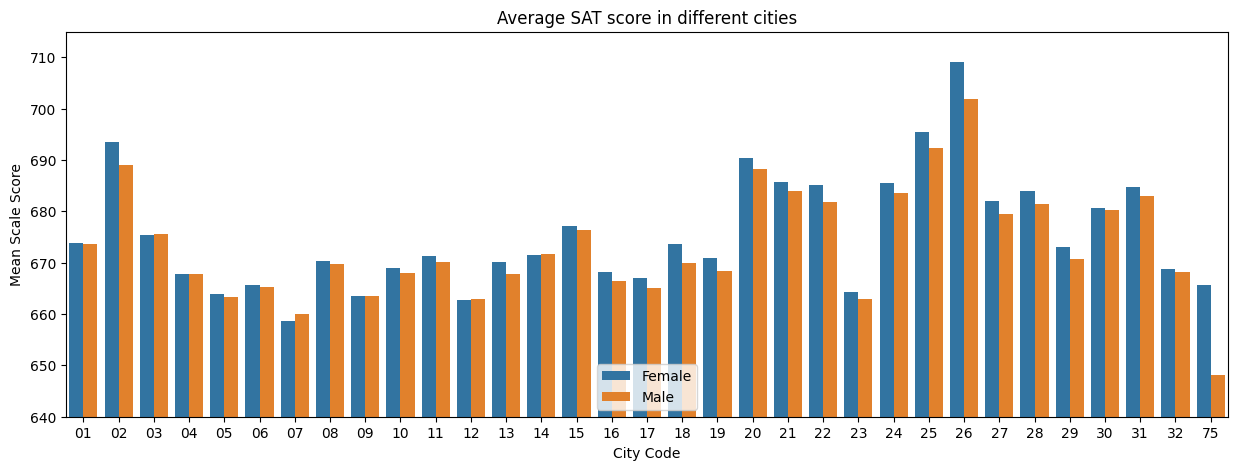

In [111]:
#Extracting the Mean score for every city and storing it the new dataframe name df1
df1 = pd.DataFrame(dataset_allgrade.groupby(['city code','Demographic'])['Mean Scale Score'].mean())
df1.reset_index(level=0, inplace=True)
df1.reset_index(level=0, inplace=True)

#chart 2: Average score by students in different cities
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(x = df1['city code'], y = df1['Mean Scale Score'], hue = df1['Demographic'])
plt.ylim(640,715)
plt.legend(loc = 'lower center')
plt.title('Average SAT score in different cities')
plt.xlabel('City Code')
plt.ylabel('Mean Scale Score')
plt.show()

### What is/are the insight(s) found from the chart?

1. Best performers are from city code 26 and Students from city code 75 are not performing well.
2. Also in city wiht code 75 has highest difference in mean score in male and famale students.

3. Male from city 75 score least in the SAT.

## 5.3 Checking which school is best.

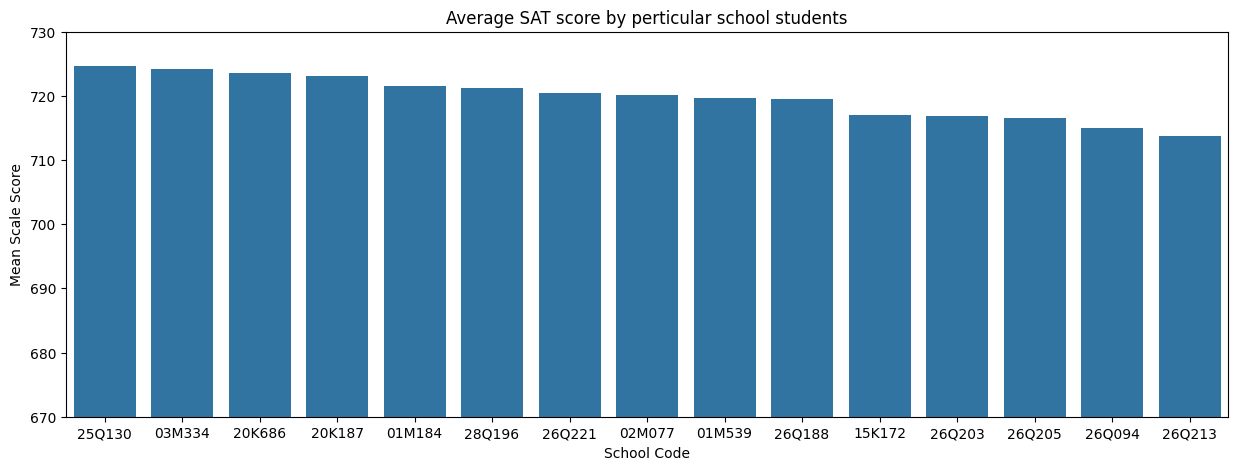

In [112]:
#Grouping by data on DBN
df2 = pd.DataFrame(dataset_allgrade.groupby('DBN')['Mean Scale Score'].mean())
df2.sort_values(by='Mean Scale Score', inplace=True,ascending=False)
df2.reset_index(level=0, inplace=True)
df2 = df2.head(15)

#chart 3
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(x = df2['DBN'], y = df2['Mean Scale Score'])
plt.ylim(670,730)
plt.title('Average SAT score by perticular school students')
plt.xlabel('School Code')
plt.ylabel('Mean Scale Score')
plt.show()

## 5.4 Trend of mean score

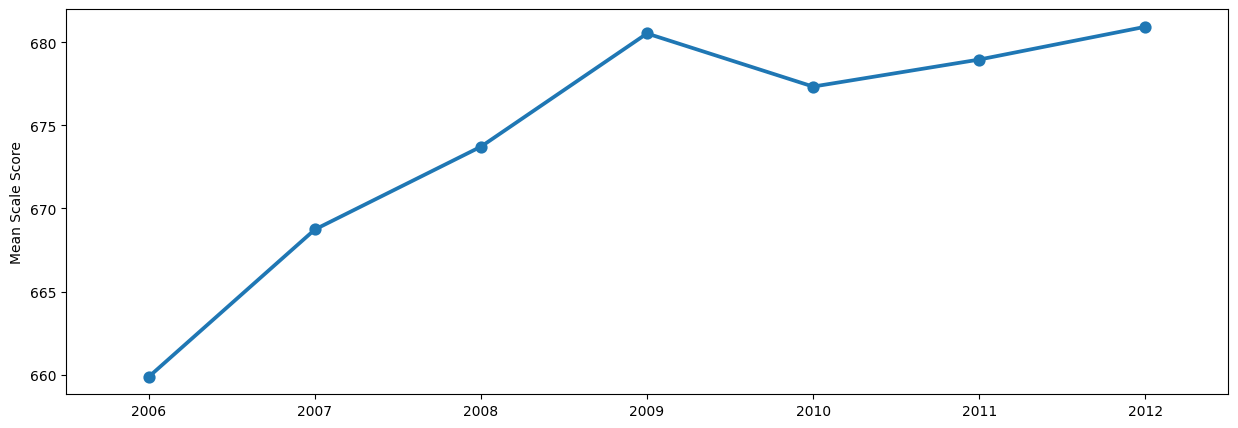

In [113]:
x1 = [2006,2007,2008,2009,2010,2011,2012]
y1 = dataset[dataset['Grade']=='All Grades'].groupby(dataset['Year'])['Mean Scale Score'].mean()

#chart4 : Year vs Mean Score
sns.pointplot(x = x1,y = y1)
plt.show()

### What is/are the insight(s) found from the chart?

We can see that every year mean score is increasing.

## 5.5 Trend of mean grade as per year based on demographics.

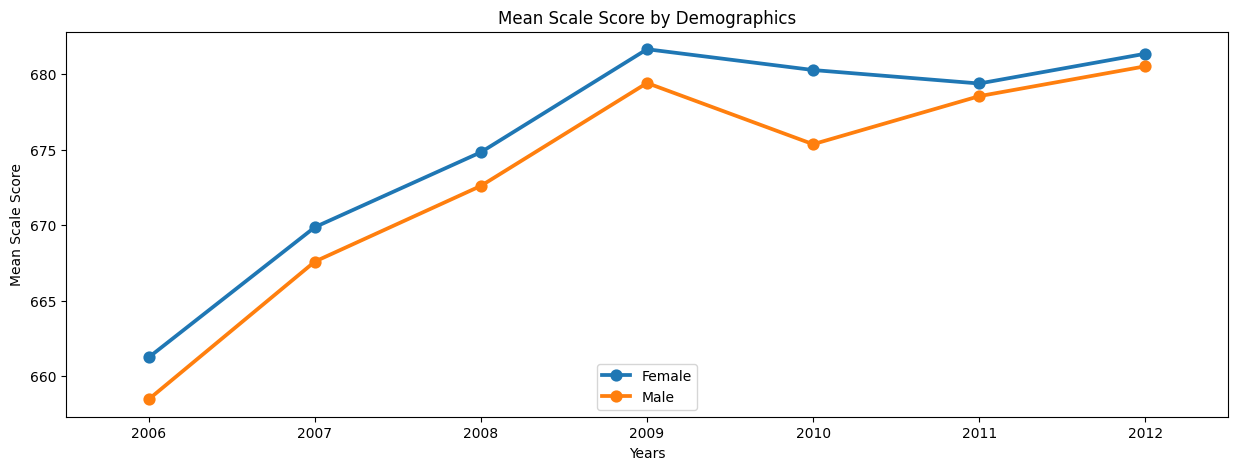

In [114]:
#Extracting the data group by on Year and demographics
df3 = pd.DataFrame(dataset_allgrade.groupby(['Year','Demographic'])['Mean Scale Score'].mean())
df3.reset_index(level=0, inplace=True)
df3.reset_index(level=0, inplace=True)

#chart 5
sns.pointplot(x = df3['Year'], y = df3['Mean Scale Score'], hue = df3['Demographic'])
#plt.ylim(650,690)
plt.legend(loc = 'lower center')
plt.title('Mean Scale Score by Demographics')
plt.xlabel('Years')
plt.ylabel('Mean Scale Score')
plt.show()

### What is/are the insight(s) found from the chart?

In general, Female students scores more than male students every year.

## 5.6 Number of student Tested every Year.

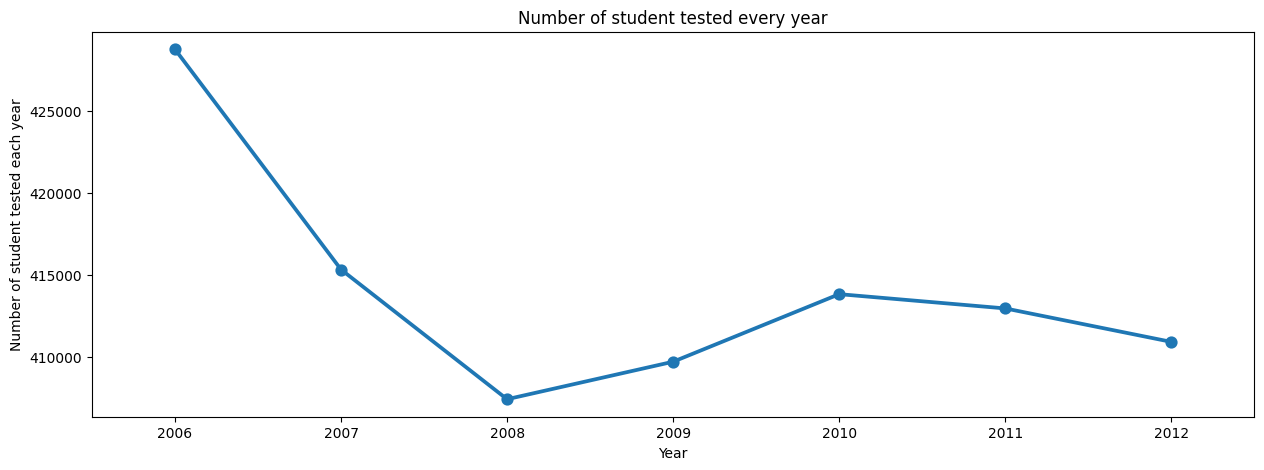

In [115]:
#chart 6: Number of Student tested vs Years
sns.pointplot(x = dataset_allgrade.groupby('Year')['Number Tested'].sum().index, y = dataset_allgrade.groupby('Year')['Number Tested'].sum())
plt.title('Number of student tested every year')
plt.xlabel('Year')
plt.ylabel('Number of student tested each year')
plt.show()


### What is/are the insight(s) found from the chart?

There has been a decline in the number of students after 2006.



## 5.7 Proportion of male and female students every year

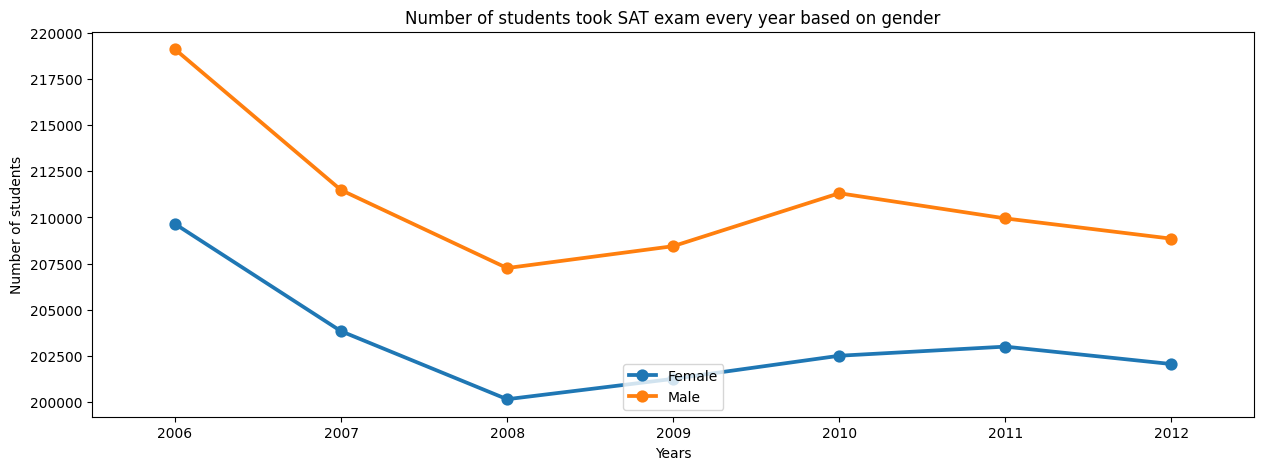

In [116]:
#Grouping by the data on Year and Demographics and checking the total number of student who took SAT exam
df4 = pd.DataFrame(dataset_allgrade.groupby(['Year','Demographic'])['Number Tested'].sum())
df4.reset_index(level=0, inplace=True)
df4.reset_index(level=0, inplace=True)

#chart 7
sns.pointplot(x = df4['Year'], y = df4['Number Tested'] ,hue = df4['Demographic'])
plt.legend(loc = 'lower center')
plt.title('Number of students took SAT exam every year based on gender')
plt.xlabel('Years')
plt.ylabel('Number of students')
plt.show()

###What is/are the insight(s) found from the chart?

1. Number of male applicants are more than female applicants every year. But pattern is almost same.

2. Gap between male and female attendees is almost same every year.

## 5.8 Checking schools with least mean SAT score.

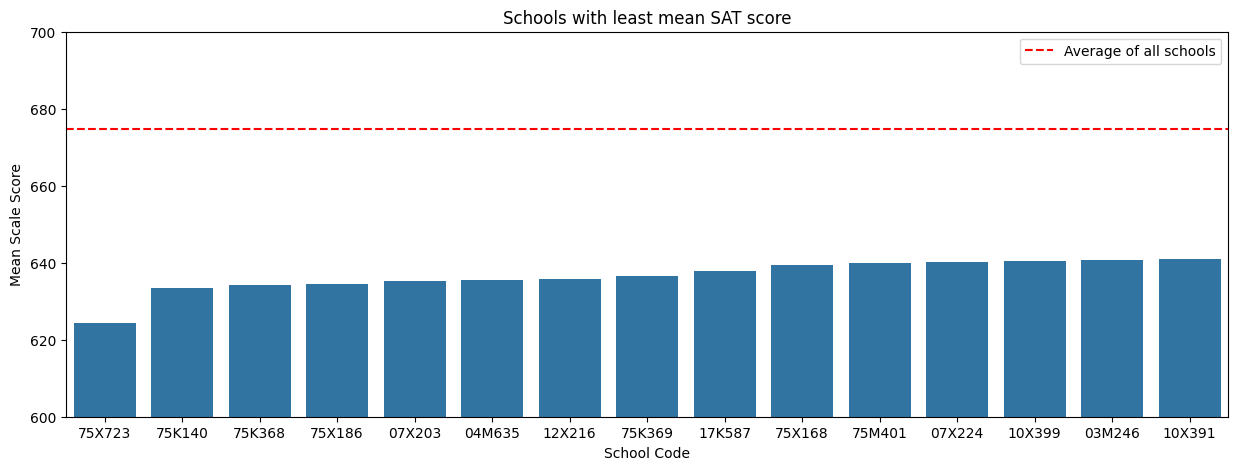

In [117]:
#Grouping by data on DBN
df5 = pd.DataFrame(dataset_allgrade.groupby('DBN')['Mean Scale Score'].mean())
df5.sort_values(by='Mean Scale Score', inplace=True,ascending=True)
df5.reset_index(level=0, inplace=True)
df5 = df5.head(15)

#chart 8
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(x = df5['DBN'], y = df5['Mean Scale Score'])
plt.axhline(y=dataset_allgrade['Mean Scale Score'].mean(), color='red', linestyle='--', label='Average of all schools')
plt.ylim(600,700)
plt.legend()
plt.title('Schools with least mean SAT score')
plt.xlabel('School Code')
plt.ylabel('Mean Scale Score')
plt.show()

### What is/are the insight(s) found from the chart?

1. Mean score for all the schools is 674.

2. We can see that schools with lowest score are from city code 75

## 5.9 Best Schools for respective section of exam.

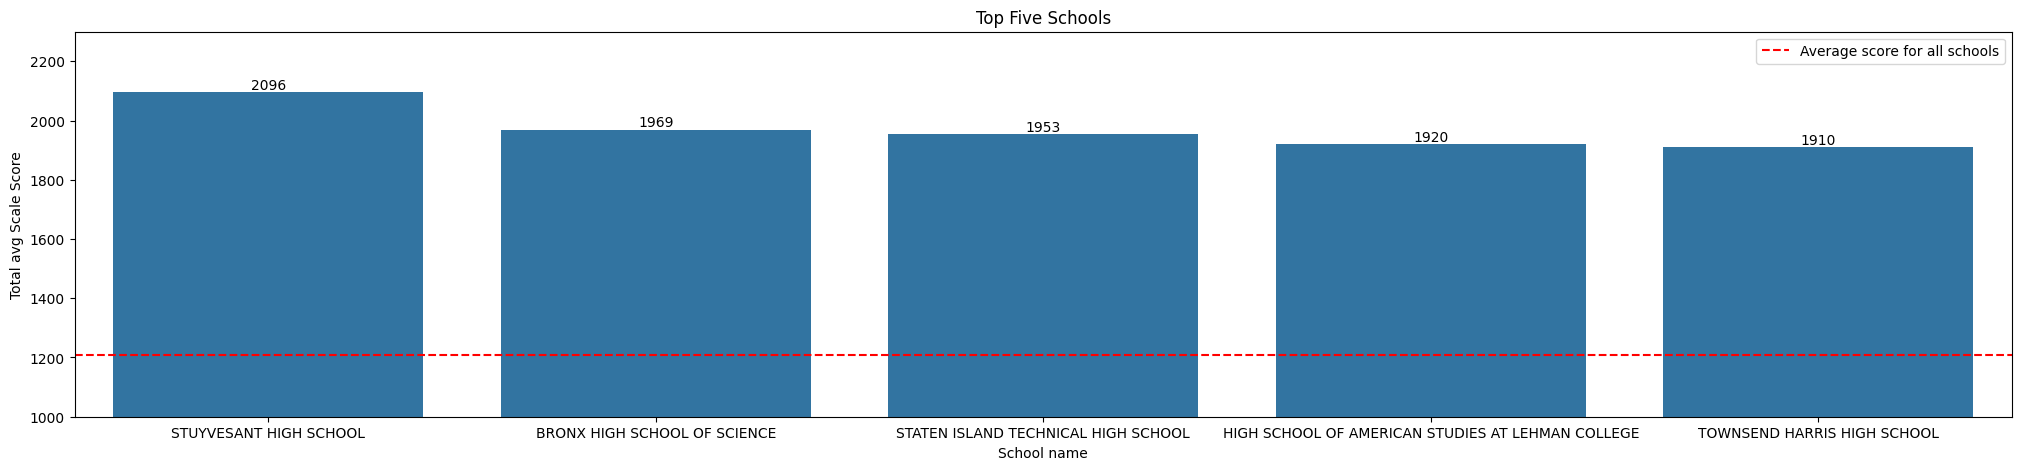

In [118]:
#Extracting the top 5 Schools with thier names
df6 = dataset_schools.sort_values(by='Total avg. SAT score', inplace=False,ascending=False)
df6 = df6.head(5)

#Chart 9
plt.rcParams['figure.figsize'] = (25, 5)
ax = sns.barplot(x = df6['SCHOOL NAME'], y = df6['Total avg. SAT score'])
for i in ax.containers:
    ax.bar_label(i,)
plt.axhline(y=dataset_schools['Total avg. SAT score'].mean(), color='red', linestyle='--', label='Average score for all schools')
plt.ylim(1000,2300)
plt.legend()
plt.title('Top Five Schools')
plt.xlabel('School name')
plt.ylabel('Total avg Scale Score')
plt.show()

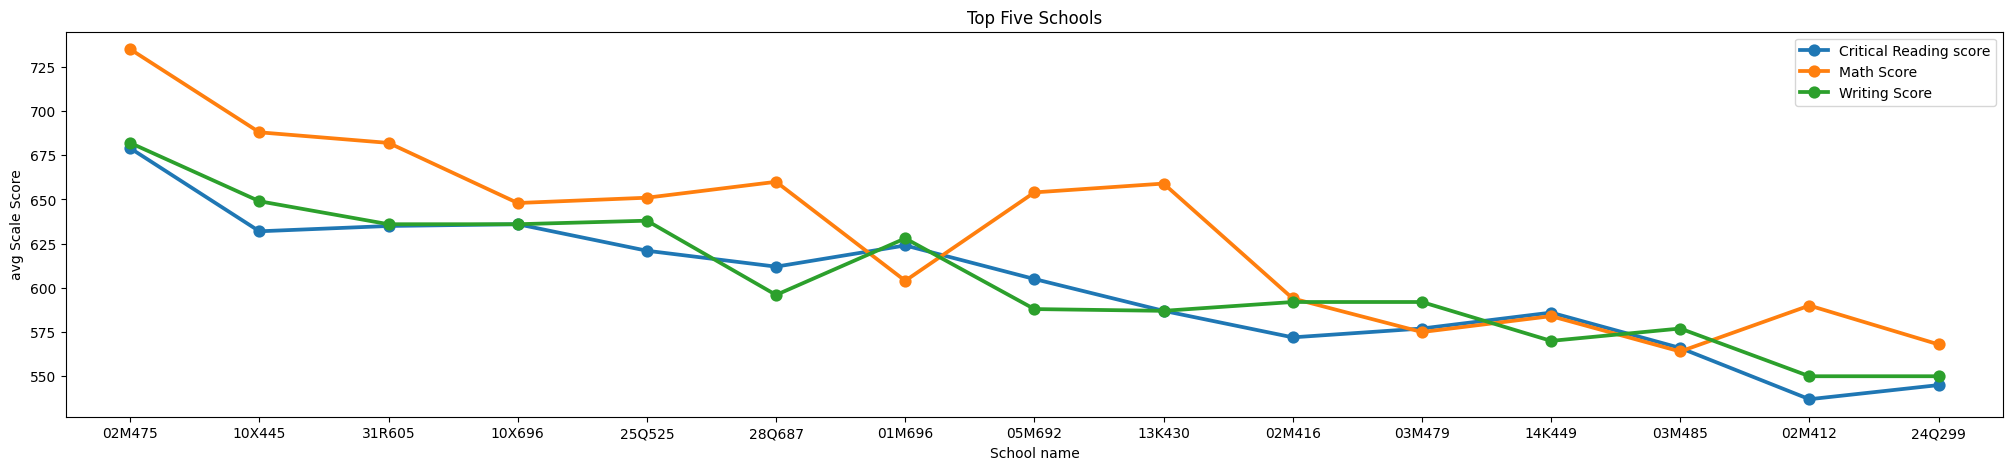

In [119]:
#Extracting the top 5 Schools with thier names
df7 = dataset_schools.sort_values(by='Total avg. SAT score', inplace=False,ascending=False)
df7 = df7.head(15)


#chart 10
plt.rcParams['figure.figsize'] = (25, 5)
#sns.pointplot(x = df6['SCHOOL NAME'], y = df6['Total avg. SAT score'])
sns.pointplot(x = df7['DBN'], y = df7['SAT Critical Reading Avg. Score'],label = 'Critical Reading score')
sns.pointplot(x = df7['DBN'], y = df7['SAT Math Avg. Score'], label = 'Math Score')
sns.pointplot(x = df7['DBN'], y = df7['SAT Writing Avg. Score'], label = 'Writing Score')
#plt.ylim(1850,2150)
plt.title('Top Five Schools')
plt.xlabel('School name')
plt.ylabel('avg Scale Score')
plt.legend(loc = 'upper right')
plt.show()

### What is/are the insight(s) found from the chart?

Basic trend which we can observe from the data that Student score more in math section than the Reading and writing section

## 5.10 School With highest number of student appeared in SAT

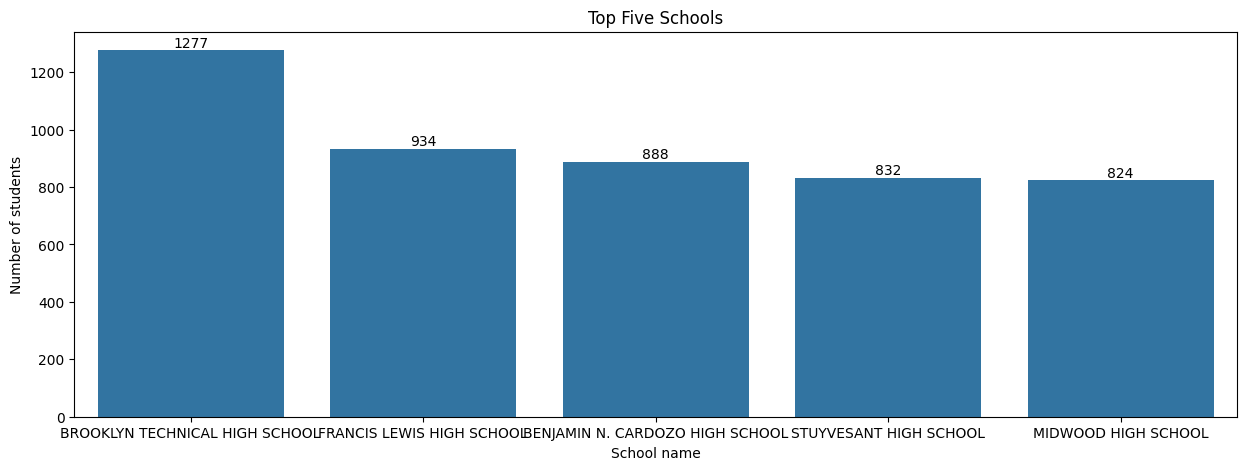

In [120]:
#Extracting the top 5 Schools with highest number of student appeared in SAT
df8 = dataset_schools.sort_values(by='Num of SAT Test Takers', inplace=False,ascending=False)
df8 = df8.head(5)

#Chart 11
plt.rcParams['figure.figsize'] = (15, 5)
ax = sns.barplot(x = df8['SCHOOL NAME'], y = df8['Num of SAT Test Takers'])
for i in ax.containers:
    ax.bar_label(i,)
#plt.ylim(1000,2300)
#plt.legend()
plt.title('Top Five Schools')
plt.xlabel('School name')
plt.ylabel('Number of students')
plt.show()

## 5.11 Cities with highest Number of Schools and students

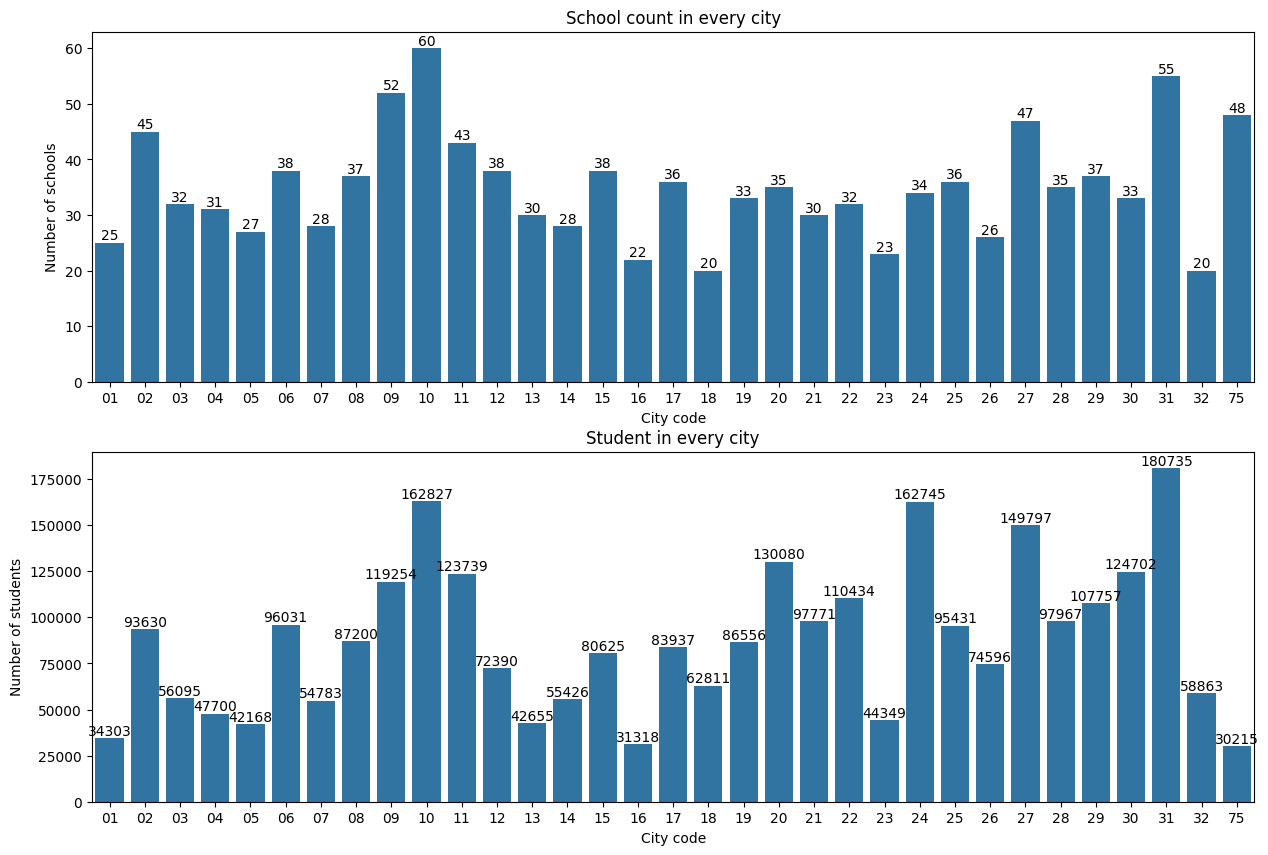

In [121]:
#Chart 12
plt.rcParams['figure.figsize'] = (15,10)

plt.subplot(2,1,1)
ax = sns.barplot(x = dataset_allgrade.groupby('city code')['DBN'].nunique().index, y = dataset_allgrade.groupby('city code')['DBN'].nunique())
for i in ax.containers:
    ax.bar_label(i,)

plt.title('School count in every city')
plt.xlabel('City code')
plt.ylabel('Number of schools')

plt.subplot(2,1,2)
ax = sns.barplot(x = dataset_allgrade.groupby('city code')['Number Tested'].sum().index, y = dataset_allgrade.groupby('city code')['Number Tested'].sum())
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Student in every city')
plt.xlabel('City code')
plt.ylabel('Number of students')

plt.show()

### What is/are the insight(s) found from the chart?

1. City 10 have the most schools and city 31 have the most number of students.
2. City 31 have the second highest number of schools.
3. City 75 have the third highest number of schools but SAT applicants from this city were minimum. Also note that Students from city 75 were also the least scorers. Indicating despite of havine lots schools in the city, Quality of education is not very good.

## 5.12 Checking distribution of students in every grade

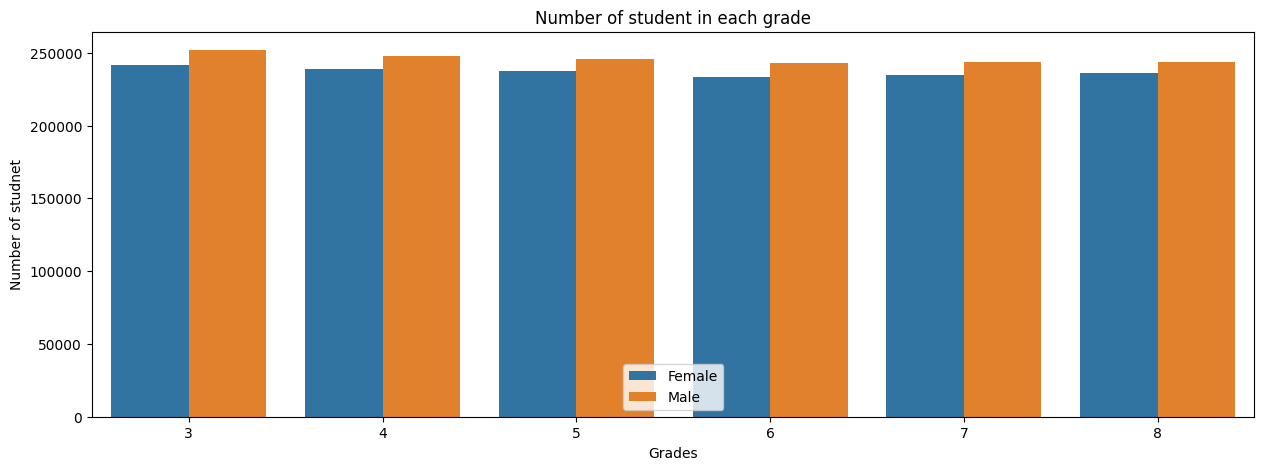

In [122]:
#Extracting data for which do not include all grade to avoid  duplicacy
df9 = dataset[dataset['Grade'] != 'All Grades'][['Grade','Demographic','Number Tested']]
df9 = pd.DataFrame(df9.groupby(['Grade','Demographic'])['Number Tested'].sum())
df9.reset_index(level=0, inplace=True)
df9.reset_index(level=0, inplace=True)
df9

#chart 13
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(x = df9['Grade'], y = df9['Number Tested'], hue = df9['Demographic'])
plt.title('Number of student in each grade')
plt.xlabel('Grades')
plt.ylabel('Number of studnet')
plt.legend(loc = 'lower center')
plt.show()

### What is/are the insight(s) found from the chart?

Number of students in every grade is almost same. Which is quite strange.

## 5.13 Percentage distribution of student in different level.

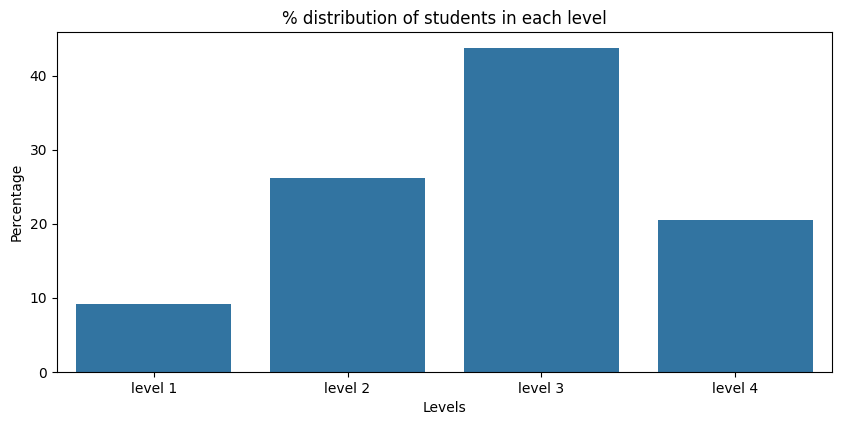

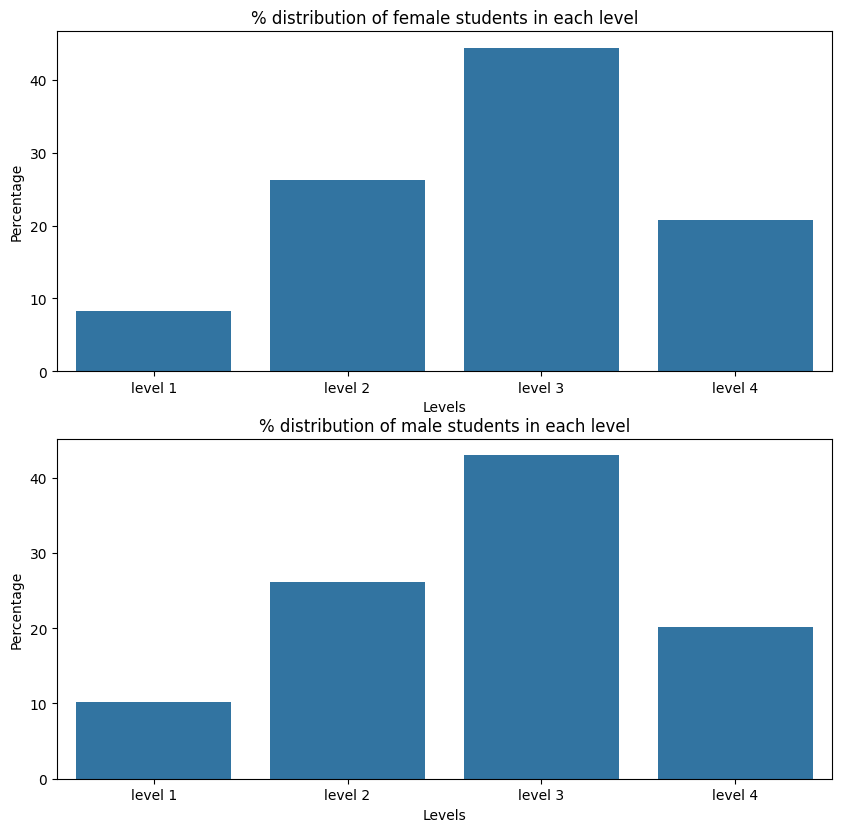

In [123]:
#chart 14
plt.rcParams['figure.figsize'] = (10,15)
plt.subplot(3,1,1)
x = ['level 1', 'level 2', 'level 3', 'level 4']
y = [dataset['Pct Level 1'].mean(),dataset['Pct Level 2'].mean(),dataset['Pct Level 3'].mean(),dataset['Pct Level 4'].mean()]
sns.barplot( x= x , y = y)
plt.title('% distribution of students in each level')
plt.xlabel('Levels')
plt.ylabel('Percentage')
plt.show()

plt.subplot(3,1,2)
x = ['level 1', 'level 2', 'level 3', 'level 4']
y = [dataset[dataset['Demographic']=='Female']['Pct Level 1'].mean(),dataset[dataset['Demographic']=='Female']['Pct Level 2'].mean(),dataset[dataset['Demographic']=='Female']['Pct Level 3'].mean(),dataset[dataset['Demographic']=='Female']['Pct Level 4'].mean()]
sns.barplot( x= x , y = y)
plt.title('% distribution of female students in each level')
plt.xlabel('Levels')
plt.ylabel('Percentage')

plt.subplot(3,1,3)
x = ['level 1', 'level 2', 'level 3', 'level 4']
y = [dataset[dataset['Demographic']=='Male']['Pct Level 1'].mean(),dataset[dataset['Demographic']=='Male']['Pct Level 2'].mean(),dataset[dataset['Demographic']=='Male']['Pct Level 3'].mean(),dataset[dataset['Demographic']=='Male']['Pct Level 4'].mean()]
sns.barplot( x= x , y = y)
plt.title('% distribution of male students in each level')
plt.xlabel('Levels')
plt.ylabel('Percentage')

plt.show()

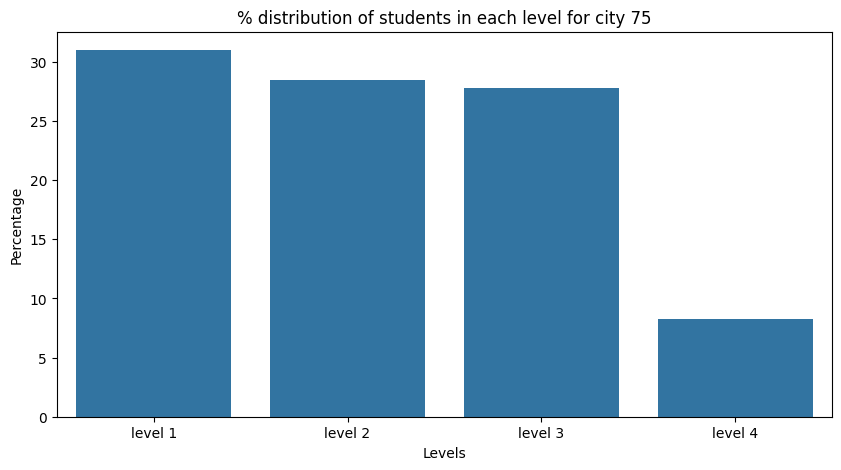

In [124]:
#chart 15
plt.rcParams['figure.figsize'] = (10,5)
x = ['level 1', 'level 2', 'level 3', 'level 4']
y = [dataset[dataset['city code']=='75']['Pct Level 1'].mean(),dataset[dataset['city code']=='75']['Pct Level 2'].mean(),dataset[dataset['city code']=='75']['Pct Level 3'].mean(),dataset[dataset['city code']=='75']['Pct Level 4'].mean()]
sns.barplot( x= x , y = y)
plt.title('% distribution of students in each level for city 75')
plt.xlabel('Levels')
plt.ylabel('Percentage')
plt.show()

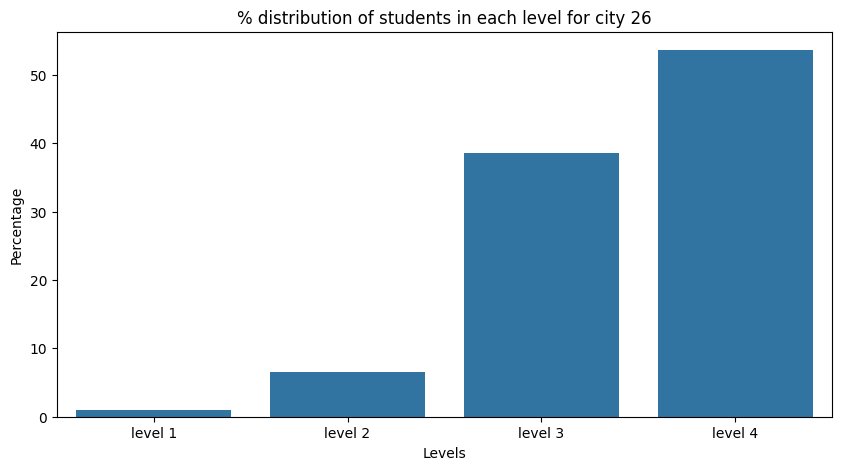

In [125]:
#chart 16
plt.rcParams['figure.figsize'] = (10,5)
x = ['level 1', 'level 2', 'level 3', 'level 4']
y = [dataset[dataset['city code']=='26']['Pct Level 1'].mean(),dataset[dataset['city code']=='26']['Pct Level 2'].mean(),dataset[dataset['city code']=='26']['Pct Level 3'].mean(),dataset[dataset['city code']=='26']['Pct Level 4'].mean()]
sns.barplot( x= x , y = y)
plt.title('% distribution of students in each level for city 26')
plt.xlabel('Levels')
plt.ylabel('Percentage')
plt.show()

### What is/are the insight(s) found from the chart?

1. Most of the student irrespective of their gender, are in level 3, where level 3 signifies Meeting Learning Standards.

2. For City code 75, Distribution changes dramatically. for entire dataset students in level 1 are nearly 10% but for city 75 it 30%

3. For city code 26, Most of the student are in level 1 and level 2, Signifies that in city 26 quality of education is really good means city 26 must be a education hub.



# 6 Conclusion

1. Mean scale score is normally distributed.

2. Students with Score 3 are best performers. And as grade increases, Score decreases.

3. Best performers are from city code 26 and Students from city code 75 get the lowest marks. There is the biggest difference in the marks of males and femals in city code 75.

4. Male from city 75 get the lowest score in the SAT.

5. We can see that every year mean score is increasing.

6. In general, Female students scores more than male students every year.

7. There has been a decline in the number of students after 2006.

8. Number of male applicants are more than female applicants every year. But pattern is almost same.

9. Gap between male and female attendees is almost same every year.

10. Mean score for all the schools is 674.

11. We can see that schools with lowest score are from city code 75.

12. City 10 have the most schools and city 31 have the most number of students.

13. City 31 have the second highest number of schools.

14. City 75 have the third highest number of schools but SAT applicants from this city were minimum. Also note that Students from city 75 were also the least scorers. Indicating despite of havine lots schools in the city, Quality of education is poor.

15. Number of students in every grade is almost same. Which is quite strange.

16. Most of the student irrespective of their gender, are in level 3, where level 3 signifies Meeting Learning Standards.

17. For City code 75, Distribution changes dramatically. for entire dataset students in level 1 are nearly 10% but for city 75 it 30%

18. For city code 26, Most of the student are in level 1 and level 2, Signifies that in city 26 quality of education is really good means city 26 must be a education hub.

# 7 Downloading the datasets after manipulation

In [55]:
dataset_allgrade_no = dataset[dataset['Grade']!='All Grades']

In [56]:
dataset_allgrade_no.to_csv('dataset_allgrade_no.csv')

In [53]:
dataset_allgrade.to_csv('dataset_allgrade')

In [57]:
dataset_schools.to_csv('dataset_schools.csv')

In [54]:
dataset.to_csv('dataset_powerbi.csv')